Celeb Faces Dataset (CelebA)
=================================================
---
Introduction au Deep Learning  (IDLE) - S. Arias, E. Maldonado, JL. Parouty - CNRS/SARI/DEVLOG - 2020  

## Episode 2 : Check clustered dataset

 - Reload our dataset
 - Check and verify


## Step 1 - Import and init
### 1.2 - Import

In [1]:
import numpy as np
import pandas as pd

import os,time,sys,json,glob,importlib
import math, random

import modules.data_generator
from modules.data_generator import DataGenerator

sys.path.append('..')
import fidle.pwk as ooo

ooo.init()


FIDLE 2020 - Practical Work Module
Version              : 0.2.7
Run time             : Sunday 9 February 2020, 22:16:56
TensorFlow version   : 2.0.0
Keras version        : 2.2.4-tf


### 1.2 - Directories and files :

In [4]:
# ---- The dataset directory
dataset_dir = '/bettik/PROJECTS/pr-fidle/datasets/celeba'

# ---- The location of our clusters of data
cluster_dir  = f'{dataset_dir}/clusters-xs.train'

## Step 2 - Data verification
What we're going to do:
 - Recover all clusters by normalizing images
 - Make some statistics to be sure we have all the data
 - picking one image per cluster to check that everything is good.

In [5]:
# ---- Return a legend from a description 
def get_legend(x_desc,i):
    cols  = x_desc.columns
    desc  = x_desc.iloc[i]
    legend =[]
    for i,v in enumerate(desc):
        if v==1 : legend.append(cols[i])
    return str('\n'.join(legend))

start_time = time.time()

# ---- get cluster list
clusters_name = [ os.path.splitext(f)[0] for f in glob.glob( f'{cluster_dir}/*.npy') ]
# ---- Counters set to 0
imax  = len(clusters_name)
i,n1,n2,s = 0,0,0,0
imgs,desc = [],[]

# ---- Reload all clusters
ooo.update_progress('Load clusters :',i,imax, redraw=True)
for cluster_name in clusters_name:  
    # ---- reload images and normalize
    x_data = np.load(cluster_name+'.npy')
    x_data = x_data/255
    # ---- reload descriptions
    x_desc = pd.read_csv(cluster_name+'.csv', header=0)
    # ---- counters
    n1 += len(x_data)
    n2 += len(x_desc.index)
    s  += x_data.nbytes
    i  += 1
    # ---- get somes images/legends
    j=random.randint(0,len(x_data)-1)
    imgs.append( x_data[j].copy() )
    desc.append( get_legend(x_desc,j) )
    x_data=None
    # ---- to appear professional
    ooo.update_progress('Load clusters :',i,imax, redraw=True)

d=time.time()-start_time

print(f'Loading time      : {d:.2f} s or {ooo.hdelay(d)}')
print(f'Number of cluster : {i}')
print(f'Number of images  : {n1}')
print(f'Number of desc.   : {n2}')
print(f'Total size of img : {ooo.hsize(s)}')

Load clusters :  [########] 100.0% of 8
Loading time      : 0.47 s or 0:00:00
Number of cluster : 8
Number of images  : 780
Number of desc.   : 780
Total size of img : 692.8 Mo


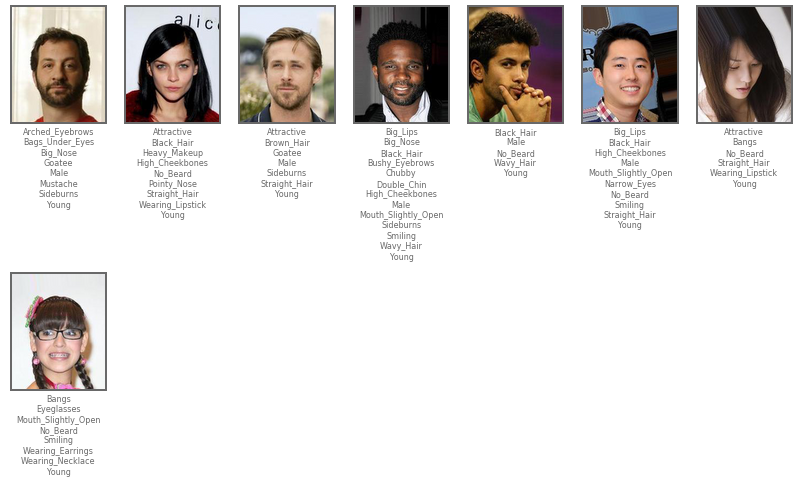

In [6]:
ooo.plot_images(imgs,desc,x_size=2,y_size=2,fontsize=8,columns=7,y_padding=2.5)

<div class='nota'>
    <b>Note :</b> With this approach, the use of data is much much more effective !
    <ul>
        <li>Data loading speed : <b>x 10</b> (81 s vs 16 min.)</li>
        <li>Memory efficiency  : <b>x 20</b> (21 Go vs 175 Go) </li>
    </ul>
</div>

## Step 3 - How we will read our data during the train session
We are going to use a "dataset reader", which is a [tensorflow.keras.utils.Sequence](https://www.tensorflow.org/api_docs/python/tf/keras/utils/Sequence)  
The batches will be requested to our DataGenerator, which will read the clusters as they come in.

### 3.1 - An example to understand

In [8]:
# ---- A very small dataset

clusters_dir = f'{dataset_dir}/clusters-xs.train'

# ---- Our DataGenerator
#      with small batch size, debug mode and 50% of the dataset

data_gen = DataGenerator(clusters_dir, 32, debug=True, k_size=0.5)

# ---- We ask him to retrieve all batchs

batch_sizes=[]
for i in range( len(data_gen)):
    x,y = data_gen[i]
    batch_sizes.append(len(x))

print(f'\n\ntotal number of items : {sum(batch_sizes)}')
print(f'batch sizes      : {batch_sizes}')
print(f'Last batch shape : {x.shape}')



FIDLE 2020 - DataGenerator
Version              : 0.4

Clusters nb  : 8 files
Dataset size : 390
Batch size   : 32

[shuffle!]

[Load 00,s=100] (32) (32) (32) (4..) 
[Load 01,s=100] (..28) (32) (32) (8..) 
[Load 02,s=100] (..24) (32) (32) (12..) 
[Load 03,s=100] (..20) (32) (32) 

total number of items : 384
batch sizes      : [32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32]
Last batch shape : (32, 218, 178, 3)


----
That's all folks !